# Analysis

## importing packages

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest, norm
from scipy.stats import wilcoxon
from scipy.stats import anderson
from scipy.stats import shapiro


## Procesing the data

### Hard Sudokus data

In [2]:
df = pd.read_csv('test_mrv.csv')
df2 = pd.read_csv('test_random.csv')
df3 = pd.read_csv('test_jw.csv')
df4 = pd.read_csv('test_dcls.csv')
df5 = pd.read_csv('test_dcls_2.csv')

final_df = pd.concat([df,df2,df3,df4,df5])

In [3]:
pd.set_option('display.max_rows', 200)

final_df.drop(['Unnamed: 0'], inplace = True, axis=1)

In [4]:
final_df.columns

Index(['0', '1', '2', '3'], dtype='object')

In [5]:
final_df.reset_index(inplace=True)

In [6]:
final_df.drop(['index'], inplace = True, axis=1)

In [7]:
final_df.columns = ['sudoku_nr','heuristic','time','n_backtracks']

<AxesSubplot:xlabel='time', ylabel='Count'>

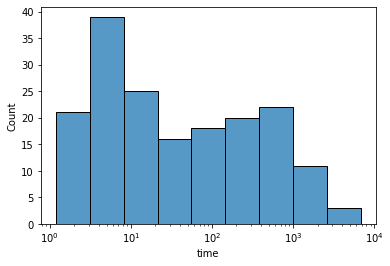

In [8]:
sns.histplot(data=final_df, x="time",log_scale=True)

<AxesSubplot:xlabel='n_backtracks', ylabel='Count'>

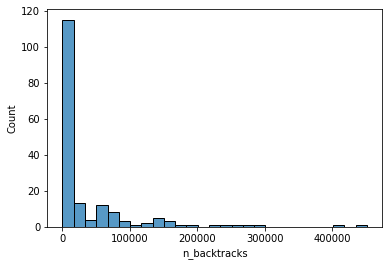

In [9]:
sns.histplot(data=final_df, x="n_backtracks",log_scale=False)

In [10]:
final_df['log_time'] = final_df['time'].apply(np.log)


,sudoku_nr,heuristic,time,n_backtracks,log_time
0,0,MRV,4.187522,162,1.432109
1,1,MRV,6.517087,234,1.874427
2,2,MRV,3.965863,31,1.377724
3,3,MRV,3.691061,46,1.305914
4,4,MRV,4.748439,77,1.557816
5,5,MRV,4.976777,179,1.604783
6,6,MRV,5.895762,245,1.774234
7,7,MRV,3.688592,27,1.305245
8,8,MRV,8.753648,466,2.169471
9,9,MRV,5.987909,294,1.789742


In [72]:
final_df.describe()

,sudoku_nr,time,n_backtracks,log_time
count,175.000000,175.000000,175.000000,175.000000
mean,17.000000,302.658749,36788.474286,3.626509
std,10.128485,757.266907,71714.702113,2.221151
min,0.000000,1.196999,0.000000,0.179817
25%,8.000000,4.739619,211.000000,1.555955
50%,17.000000,24.294000,3494.000000,3.190229
75%,26.000000,249.401998,47280.500000,5.518872
max,34.000000,6763.462212,450837.000000,8.819290


In [71]:
df_mrv = final_df[0:35]
df_mrv.describe()

,sudoku_nr,time,n_backtracks,log_time
count,35.000000,35.000000,35.000000,35.000000
mean,17.000000,5.223510,191.800000,1.559117
std,10.246951,2.576957,221.882163,0.425277
min,0.000000,1.781308,11.000000,0.577348
25%,8.500000,3.689826,43.000000,1.305579
50%,17.000000,4.458318,104.000000,1.494771
75%,25.500000,5.996593,255.000000,1.791191
max,34.000000,14.203990,865.000000,2.653523


In [70]:
df_random = final_df[35:70]
df_random.describe()

,sudoku_nr,time,n_backtracks,log_time
count,35.000000,35.000000,35.000000,35.000000
mean,17.000000,13.029141,1661.657143,1.997158
std,10.246951,19.113746,2792.637326,1.017349
min,0.000000,1.478003,31.000000,0.390692
25%,8.500000,3.028499,141.000000,1.106208
50%,17.000000,7.409000,823.000000,2.002695
75%,25.500000,15.610507,1858.000000,2.747923
max,34.000000,104.774000,14778.000000,4.651806


In [69]:
df_jw = final_df[70:105]
df_jw.describe()

,sudoku_nr,time,n_backtracks,log_time
count,35.000000,35.000000,35.000000,35.000000
mean,17.000000,419.378410,71328.200000,4.616436
std,10.246951,868.206152,88395.047196,2.107739
min,0.000000,1.196999,0.000000,0.179817
25%,8.500000,35.304270,9226.500000,3.563974
50%,17.000000,212.522911,47408.000000,5.359050
75%,25.500000,493.332069,98278.500000,6.191476
max,34.000000,4955.610097,415648.000000,8.508276


In [68]:
df_dcls = final_df[105:140]
df_dcls.describe()

,sudoku_nr,time,n_backtracks,log_time
count,35.000000,35.000000,35.000000,35.000000
mean,17.000000,775.467391,33031.400000,5.485381
std,10.246951,1266.646945,53073.329728,1.730351
min,0.000000,15.116002,126.000000,2.715754
25%,8.500000,70.187066,2717.500000,4.251083
50%,17.000000,236.275038,10898.000000,5.464997
75%,25.500000,950.070249,44020.500000,6.838929
max,34.000000,6763.462212,281338.000000,8.819290


In [67]:
df_dcls_2 = final_df[140:]
df_dcls_2.describe()

,sudoku_nr,time,n_backtracks,log_time
count,35.000000,35.000000,35.000000,35.000000
mean,17.000000,300.195294,77729.314286,4.474454
std,10.246951,393.200881,100323.404414,2.038817
min,0.000000,1.364024,40.000000,0.310439
25%,8.500000,26.845302,7398.000000,3.285554
50%,17.000000,131.001066,34928.000000,4.875205
75%,25.500000,431.961560,113248.500000,6.061000
max,34.000000,1777.838272,450837.000000,7.483153


In [16]:
dfs = [df_mrv,df_random,df_jw,df_dcls,df_dcls_2]

In [17]:
df_c = final_df[0:70]
df_mrv_jw = pd.concat([df_mrv,df_jw])

# 1000 sudokus data

In [79]:
df_1000 = pd.read_csv('test_mrv_1000.csv')
df2_1000 = pd.read_csv('test_jw_1000.csv')
df3_1000 = pd.read_csv('test_random_1000.csv')

final_df_1000 = pd.concat([df_1000,df2_1000,df3_1000])

In [80]:
final_df_1000[1000:]

,Unnamed: 0,0,1,2,3
1,1,1,MRV,1.159996,0
2,2,2,MRV,2.308000,431
3,3,3,MRV,1.269003,43
4,4,4,MRV,1.181019,0
5,5,5,MRV,2.593980,532
...,...,...,...,...,...
994,994,994,random,2.499003,46
995,995,995,random,2.338000,4
996,996,996,random,2.564000,60
997,997,997,random,1.597650,63


In [81]:
final_df_1000.drop(['Unnamed: 0'], inplace = True, axis=1)

In [82]:
final_df_1000.columns

Index(['0', '1', '2', '3'], dtype='object')

In [83]:
final_df_1000.reset_index(inplace=True)

In [84]:
final_df_1000.drop(['index'], inplace = True, axis=1)

In [85]:
final_df_1000.columns = ['sudoku_nr','heuristic','time','n_backtracks']

In [87]:
final_df_1000[999:1998]

,sudoku_nr,heuristic,time,n_backtracks
999,0,MRV,1.337001,38
1000,1,MRV,1.159996,0
1001,2,MRV,2.308000,431
1002,3,MRV,1.269003,43
1003,4,MRV,1.181019,0
...,...,...,...,...
1993,994,MRV,3.468996,697
1994,995,MRV,1.359000,91
1995,996,MRV,1.481014,120
1996,997,MRV,1.648988,122


In [88]:
df_jw_1000 = final_df_1000[999:1998]
df_jw_1000['heuristic'] = 'JW'
df_mrv_1000 = final_df_1000[0:999]
df_ranfom_1000 =final_df_1000[1998:]
final_df_1000 = pd.concat([df_mrv_1000,df_jw_1000,df_ranfom_1000])


C:\Users\victo\AppData\Local\Temp/ipykernel_1892/2793288879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jw_1000['heuristic'] = 'JW'


In [89]:
final_df_1000['log_time'] = final_df_1000['time'].apply(np.log)


In [99]:
df_jw_1000.describe()

,sudoku_nr,time,n_backtracks
count,999.000000,999.000000,999.000000
mean,499.000000,2.956876,534.271271
std,288.530761,3.899410,1115.024476
min,0.000000,1.132999,0.000000
25%,249.500000,1.338999,34.000000
50%,499.000000,1.711985,169.000000
75%,748.500000,2.952501,557.000000
max,998.000000,49.904028,14210.000000


In [100]:
df_mrv_1000.describe()

,sudoku_nr,time,n_backtracks
count,999.000000,999.000000,999.000000
mean,499.000000,2.332314,28.014014
std,288.530761,0.208211,24.510147
min,0.000000,1.134990,3.000000
25%,249.500000,2.255002,13.000000
50%,499.000000,2.325998,20.000000
75%,748.500000,2.417001,35.000000
max,998.000000,3.349000,196.000000


In [101]:
df_ranfom_1000.describe()

,sudoku_nr,time,n_backtracks
count,999.000000,999.000000,999.000000
mean,499.000000,2.185460,87.235235
std,288.530761,0.847475,127.706561
min,0.000000,1.176003,1.000000
25%,249.500000,1.435991,24.000000
50%,499.000000,2.326001,48.000000
75%,748.500000,2.639998,102.500000
max,998.000000,8.669000,1606.000000


In [90]:
final_df_1000

,sudoku_nr,heuristic,time,n_backtracks,log_time
0,0,MRV,2.127001,22,0.754713
1,1,MRV,2.200000,19,0.788457
2,2,MRV,2.157999,22,0.769182
3,3,MRV,2.250000,32,0.810930
4,4,MRV,2.279998,25,0.824175
...,...,...,...,...,...
2992,994,random,2.499003,46,0.915892
2993,995,random,2.338000,4,0.849296
2994,996,random,2.564000,60,0.941569
2995,997,random,1.597650,63,0.468534


## Ploting

<AxesSubplot:xlabel='sudoku_nr', ylabel='n_backtracks'>

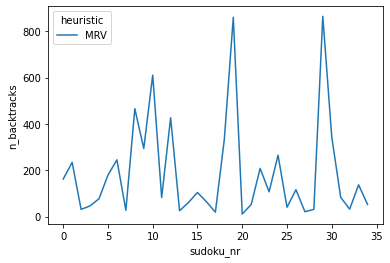

In [26]:
sns.lineplot(data=dfs[0], x="sudoku_nr", y="n_backtracks", hue="heuristic")

<AxesSubplot:xlabel='sudoku_nr', ylabel='n_backtracks'>

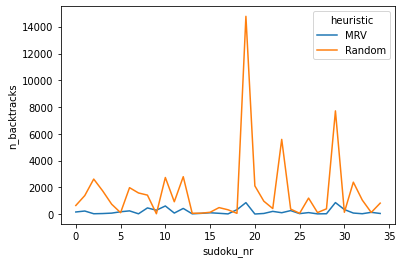

In [27]:
sns.lineplot(data=df_c, x="sudoku_nr", y="n_backtracks", hue="heuristic", markers="o")

<AxesSubplot:xlabel='sudoku_nr', ylabel='n_backtracks'>

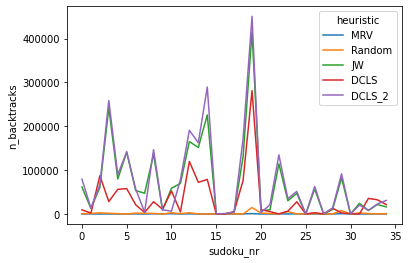

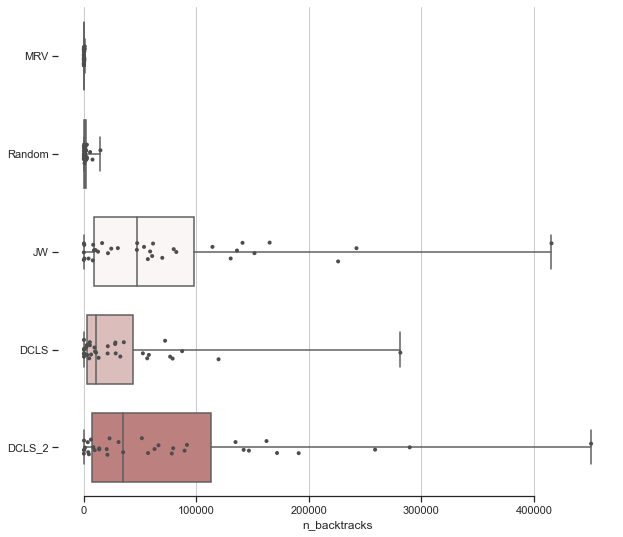

In [29]:


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="n_backtracks", y="heuristic", data=final_df,
            whis=[0, 100], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="n_backtracks", y="heuristic", data=final_df,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

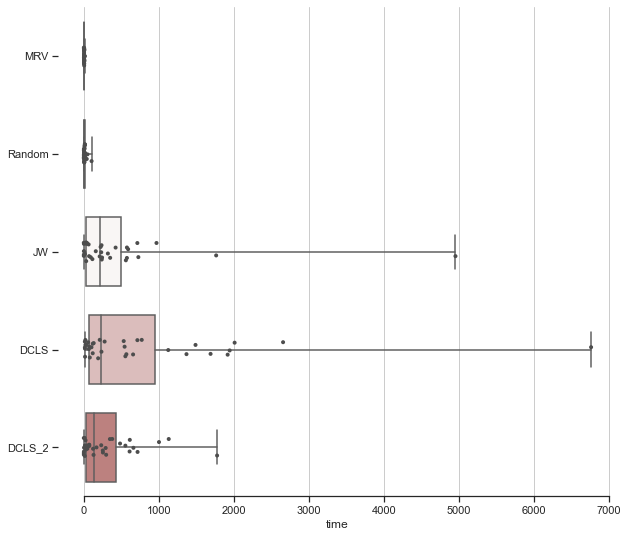

In [30]:


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time", y="heuristic", data=final_df,
            whis=[0, 100], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="time", y="heuristic", data=final_df,
              size=4, color=".3",alpha=0.4, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

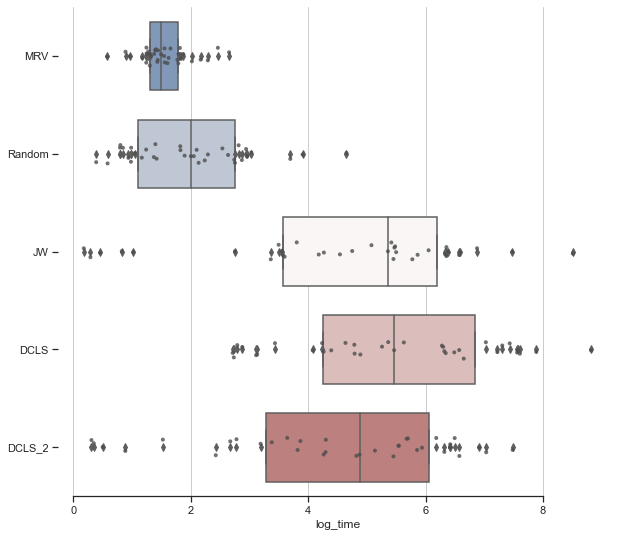

In [66]:


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="log_time", y="heuristic", data=final_df,
            whis=[25, 75], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="log_time", y="heuristic", data=final_df,
              size=4, color=".3",alpha=0.8, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

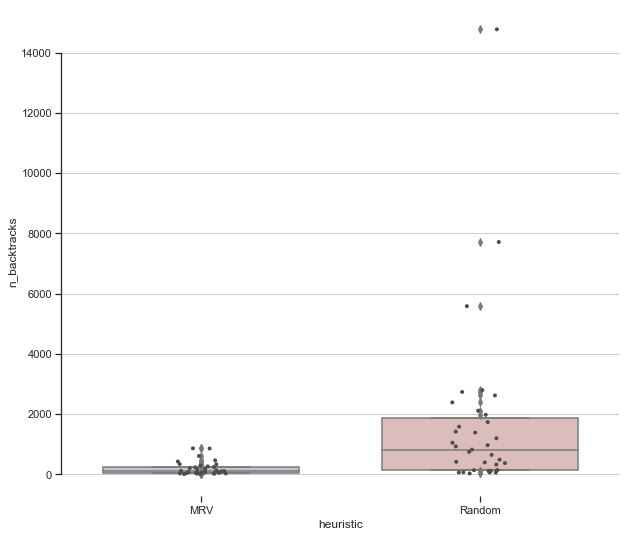

In [32]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="n_backtracks", x="heuristic", data=df_c,
            whis=[25, 75], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="n_backtracks", x="heuristic", data=df_c,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.yaxis.grid(True)
#ax.set(ylabel="")
sns.despine(trim=True, bottom = True)

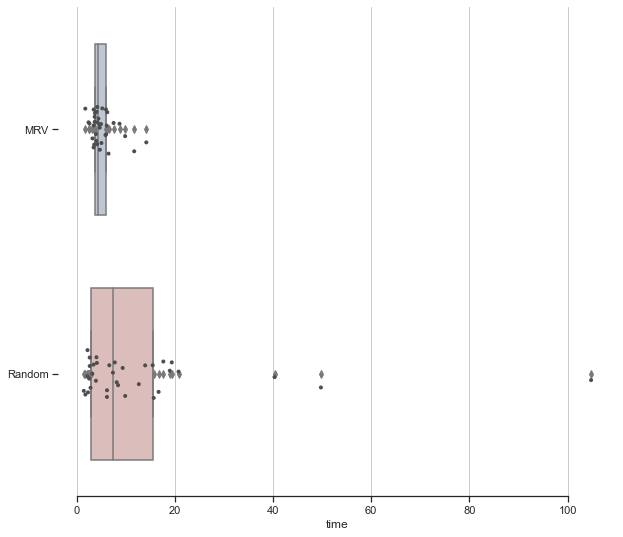

In [33]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time", y="heuristic", data=df_c,
            whis=[25, 75], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="time", y="heuristic", data=df_c,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## plots for 1000

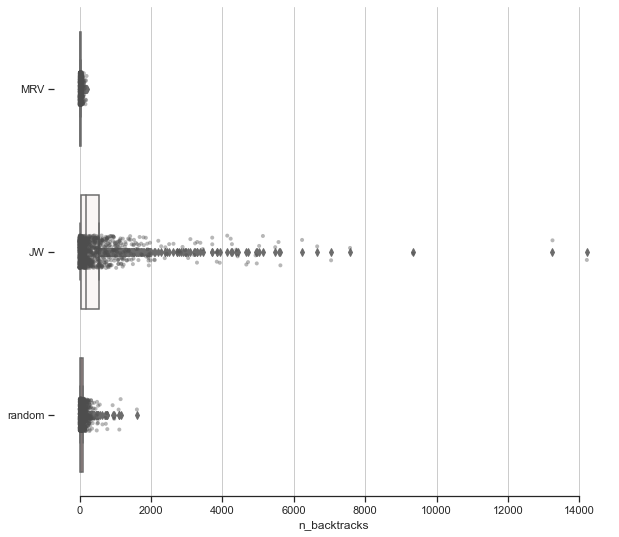

In [91]:

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="n_backtracks", y="heuristic", data=final_df_1000,
            whis=[0, 75], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="n_backtracks", y="heuristic", data=final_df_1000,
              size=4, color=".3",alpha=0.4, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

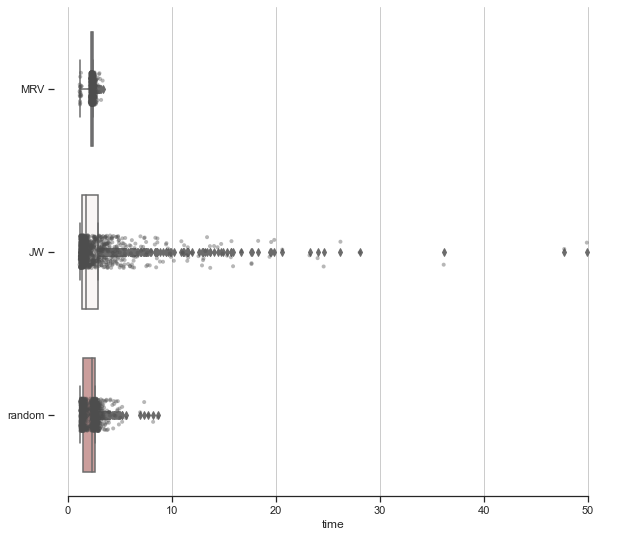

In [92]:

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time", y="heuristic", data=final_df_1000,
            whis=[0, 75], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="time", y="heuristic", data=final_df_1000,
              size=4, color=".3",alpha=0.4, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<AxesSubplot:xlabel='time', ylabel='n_backtracks'>

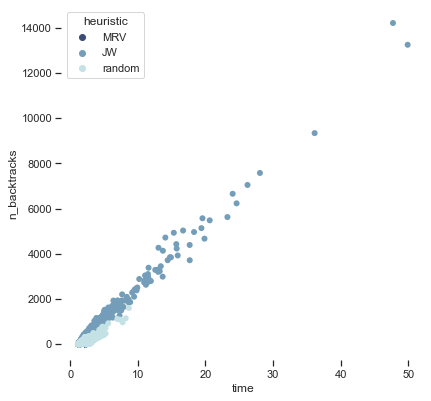

In [93]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="time", y="n_backtracks",
                hue="heuristic",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=final_df_1000, ax=ax)

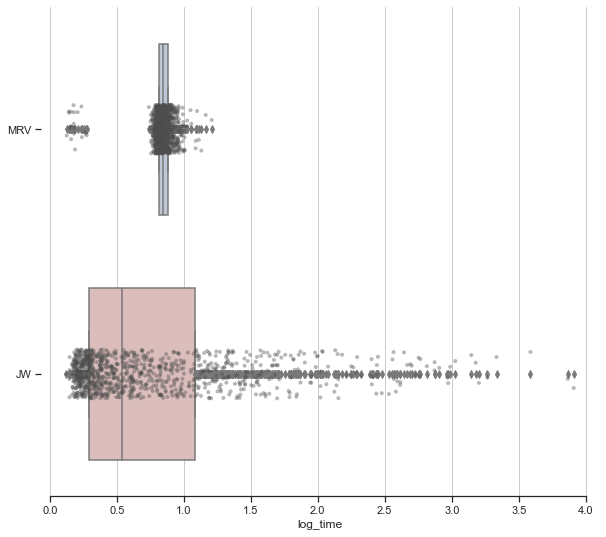

In [60]:


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="log_time", y="heuristic", data=final_df_1000,
            whis=[25, 75], width=.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="log_time", y="heuristic", data=final_df_1000,
              size=4, color=".3",alpha=0.4, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Statistical test

## Normality check

In [115]:
time = df_mrv['time'].to_numpy()
backs = df_mrv['n_backtracks'].to_numpy()

In [111]:
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(backs)
print('Back')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Back
stat=0.765, p=0.000
Probably not Gaussian


In [116]:
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(time)
print('Time')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Time
stat=0.818, p=0.000
Probably not Gaussian


In [125]:
time = df_jw['time'].to_numpy()
backs = df_jw['n_backtracks'].to_numpy()

In [126]:
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(backs)
print('Back')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Back
stat=0.765, p=0.000
Probably not Gaussian


In [121]:
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(time)
print('Time')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Time
stat=0.461, p=0.000
Probably not Gaussian


In [128]:
time = df_random['time'].to_numpy()
backs = df_random['n_backtracks'].to_numpy()

In [129]:
time = df_random['time'].to_numpy()
backs = df_random['n_backtracks'].to_numpy()
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(time)
print('Time')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(backs)
print('Back')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Time
stat=0.561, p=0.000
Probably not Gaussian


In [130]:
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(backs)
print('Back')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Back
stat=0.566, p=0.000
Probably not Gaussian


### the data is not normal distributed

Wilcoxon Signed-rank test is selected, all samples come from the same population

MRV vs Random selection

In [40]:
x = df_mrv['n_backtracks'].to_numpy()
y = df_random['n_backtracks'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 39.0 ; p-value: 6.165194790382182e-06
H1 is accepted, Null hypotehis rejected


In [41]:
x = df_mrv['time'].to_numpy()
y = df_random['time'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 118.0 ; p-value: 0.001252305467525048
H1 is accepted, Null hypotehis rejected


In [42]:
x = df_mrv['n_backtracks'].to_numpy()
y = df_jw['n_backtracks'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 6.0 ; p-value: 4.167238601509983e-07
H1 is accepted, Null hypotehis rejected


In [43]:
x = df_mrv['time'].to_numpy()
y = df_jw['time'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 15.0 ; p-value: 8.935391176147764e-07
H1 is accepted, Null hypotehis rejected


In [44]:
x = df_mrv['n_backtracks'].to_numpy()
y = df_dcls['n_backtracks'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 3.0 ; p-value: 3.21660235864676e-07
H1 is accepted, Null hypotehis rejected


In [45]:
x = df_mrv['time'].to_numpy()
y = df_dcls['time'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 0.0 ; p-value: 2.4770276393652366e-07
H1 is accepted, Null hypotehis rejected


In [46]:
x = df_mrv['n_backtracks'].to_numpy()
y = df_dcls_2['n_backtracks'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 2.0 ; p-value: 4.371614103328839e-07
H1 is accepted, Null hypotehis rejected


In [47]:
x = df_mrv['time'].to_numpy()
y = df_dcls_2['time'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 14.0 ; p-value: 8.217826514754129e-07
H1 is accepted, Null hypotehis rejected


## test for 1000 sudokus

In [134]:
time = df_ranfom_1000['time'].to_numpy()
backs = df_ranfom_1000['n_backtracks'].to_numpy()
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(time)
print('Time')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(backs)
print('Back')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Time
stat=0.831, p=0.000
Probably not Gaussian
Back
stat=0.548, p=0.000
Probably not Gaussian


In [49]:
x = df_mrv_1000['time'].to_numpy()
y = df_jw_1000['time'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 207460.0 ; p-value: 3.5501913197863437e-06
H1 is accepted, Null hypotehis rejected


In [50]:
x = df_mrv_1000['n_backtracks'].to_numpy()
y = df_jw_1000['n_backtracks'].to_numpy()
w, p = wilcoxon(x,y)

print(f"Wilcoxon value: {w} ; p-value: {p}")
if p < 0.005: print("H1 is accepted, Null hypotehis rejected")
else: print("H0 accepted")

Wilcoxon value: 25776.5 ; p-value: 8.691524062689479e-132
H1 is accepted, Null hypotehis rejected


In [57]:
x = df_mrv_1000['n_backtracks'].to_numpy()
y = df_jw_1000['n_backtracks'].to_numpy()
stat, p = wilcoxon(x, y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=25776.500, p=0.000
Probably different distributions
